# Validate candlestick patterns

In [10]:
import sys

sys.path.insert(0, '/Users/lcjr86/de Jesus Lallement Dropbox/Luiz Carlos de Jesus Junior/msc_uol_ai_dissertation/data_prep/notebooks/src')
import utils as u

import pandas as pd
import random
import mplfinance as mpf
import os
import numpy as np
import datetime
from configparser import ConfigParser

In [12]:
configur = ConfigParser()
print (configur.read('../../config_files/config_candlestick_patterns.ini'))
#print ("Sections : ", configur.sections())

['../../config_files/config_candlestick_patterns.ini']


## Get the data

### Parameters

In [16]:
asset_ticket = "BTCUSDT"
timestamp = "1d"
start_date = "1 Jan, 2017"
end_date = "31 Dec, 2022"

In [17]:
input_data_path = '../../../data/10_candlesticks_signals_raw'
input_data_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_raw"
input_data_extension = ".csv"
full_path_input_data = os.path.join(input_data_path, input_data_filename + input_data_extension)

In [18]:
df = pd.read_csv(full_path_input_data)

In [6]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR,CDLENGULFING,CDLENGULFINGBULLISH,CDLENGULFINGBEARISH
0,1504224000000,4689.89,4885.55,4654.88,4834.91,560.666366,1504310399999,2.665166e+06,4000,118.660103,...,0,0,0,0,0,0,0,0,0,0
1,1504310400000,4796.16,4939.19,4286.87,4472.14,929.148595,1504396799999,4.257724e+06,7475,379.199863,...,0,0,0,0,0,0,0,0,0,0
2,1504396800000,4508.50,4714.76,4298.33,4509.08,691.216198,1504483199999,3.121053e+06,6022,258.934536,...,0,0,0,0,0,0,0,0,0,0
3,1504483200000,4505.00,4527.49,3972.51,4100.11,1394.644614,1504569599999,5.909947e+06,9317,578.600851,...,0,0,0,0,0,0,0,0,0,0
4,1504569600000,4106.97,4484.99,3603.00,4366.47,1228.938157,1504655999999,5.083453e+06,10084,533.476065,...,0,0,0,0,0,0,0,0,0,0


## Set the index on the dataframe

In [19]:
df['date_index'] = df['date']
df.set_index('date_index', inplace=True)

KeyError: 'date'

## Verify that the candlesticks are definitely showing a trend (down/up)

### Set some parameters

In [8]:
window_size = configur.getint('candlestick_patterns', 'window_size')
slope_size = configur.getint('candlestick_patterns', 'slope_size')

### Get the dates from the bullish candlesticks patterns

In [9]:
list_dates_invertedhammer = df[df['CDLINVERTEDHAMMER'] == 100]['date'].to_list()
list_dates_hammer = df[df['CDLHAMMER'] == 100]['date'].to_list()
list_dates_piercing = df[df['CDLPIERCING'] == 100]['date'].to_list()
list_dates_morningstar = df[df['CDLMORNINGSTAR'] == 100]['date'].to_list()
list_dates_bullishengulfing = df[df['CDLENGULFINGBULLISH'] == 100]['date'].to_list()

In [10]:
list_all_dates = df['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [11]:
print(f'BEFORE: number of inverted hammer:{len(list_dates_invertedhammer)}')
print(f'BEFORE: number of hammer:{len(list_dates_hammer)}')
print(f'BEFORE: number of piercing:{len(list_dates_piercing)}')
print(f'BEFORE: number of morning star:{len(list_dates_morningstar)}')
print(f'BEFORE: number of bullish engulfing:{len(list_dates_bullishengulfing)}')

BEFORE: number of inverted hammer:3
BEFORE: number of hammer:48
BEFORE: number of piercing:0
BEFORE: number of morning star:2
BEFORE: number of bullish engulfing:82


#### Run the checks to identify the real candlesticks with reversal

In [12]:
list_validate_dates_invertedhammer = []
list_new_sign_invertedhammer = []
list_sign_invertedhammer = [0] * len(list_all_dates)
for date in list_dates_invertedhammer:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if(i >= 0):
        list_validate_dates_invertedhammer.append(date)
        list_new_sign_invertedhammer.append(i*100)
        list_sign_invertedhammer[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_invertedhammer.append(0)

In [13]:
print(dict(zip(list_validate_dates_invertedhammer, list_new_sign_invertedhammer)))

{}


In [14]:
list_validate_dates_hammer = []
list_new_sign_hammer = []
list_sign_hammer = [0] * len(list_all_dates)
for date in list_dates_hammer:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if(i >= 0):    
        list_validate_dates_hammer.append(date)
        list_new_sign_hammer.append(i*100)
        list_sign_hammer[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_hammer.append(0)

In [15]:
print(dict(zip(list_validate_dates_hammer, list_new_sign_hammer)))

{'2017-10-18': 84.23302808502177, '2017-12-13': 61.558013007472404, '2018-01-10': 70.24128005249032, '2018-01-14': 30.094645493869223, '2018-02-02': 39.315966454522645, '2018-05-01': 63.950385698236, '2018-08-01': 68.61468361586446, '2018-08-03': 50.999701511494266, '2018-10-23': 60.70980396422755, '2019-03-24': 72.59683166581556, '2019-12-27': 55.740891888168356, '2020-02-22': 16.471973303149007, '2020-03-28': 74.10211889681898, '2020-04-01': 29.279081494966803, '2020-04-13': 64.46715017960108, '2020-08-22': 64.59888973534339, '2020-11-14': 61.824310876845686, '2020-11-22': 70.01064528913042, '2020-12-09': 62.43517180795367, '2020-12-11': 36.59852333946682, '2021-10-17': 39.13038685586695, '2021-11-19': 12.2418340795901, '2022-03-05': 64.58035028109968, '2022-05-07': 0.16163115830141073, '2022-06-30': 56.57300327936762, '2022-07-26': 66.86227323004744, '2022-09-16': 51.788668498691194}


In [16]:
list_validate_dates_piercing = []
list_new_sign_piercing = []
list_sign_piercing = [0] * len(list_all_dates)
for date in list_dates_piercing:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if(i >= 0):
        list_validate_dates_piercing.append(date)
        list_new_sign_piercing.append(i*100)
        list_sign_piercing[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_piercing.append(0)

In [17]:
print(dict(zip(list_validate_dates_piercing, list_new_sign_piercing)))

{}


In [18]:
list_validate_dates_morningstar = []
list_new_sign_morningstar = []
list_sign_morningstar = [0] * len(list_all_dates)
for date in list_dates_morningstar:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if(i >= 0):
        list_validate_dates_morningstar.append(date)
        list_new_sign_morningstar.append(i*100)
        list_sign_morningstar[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_morningstar.append(0)

In [19]:
print(dict(zip(list_validate_dates_morningstar, list_new_sign_morningstar)))

{}


In [20]:
list_validate_dates_bullishengulfing = []
list_new_sign_bullishengulfing = []
list_sign_bullishengulfing = [0] * len(list_all_dates)
for date in list_dates_bullishengulfing:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    # print(f'date:{date}|i:{i}')
    if(i >= 0):
        list_validate_dates_bullishengulfing.append(date)
        list_new_sign_bullishengulfing.append(i*100)
        list_sign_bullishengulfing[list_all_dates.index(date)] = i*100
    # else:
    #     list_new_sign_bullishengulfing.append(0)
    #     list_sign_bullishengulfing.append(0)

In [21]:
print(dict(zip(list_validate_dates_bullishengulfing, list_new_sign_bullishengulfing)))

{'2017-10-29': 51.56911474374826, '2018-02-19': 72.08521127912626, '2018-04-23': 67.81641810896937, '2018-07-23': 59.73601907848807, '2018-09-04': 76.62989892449012, '2018-10-31': 30.167084511248248, '2018-12-28': 64.05515882561006, '2019-01-22': 38.1688248145082, '2019-04-05': 7.043317725078521, '2019-05-19': 72.18217872500132, '2019-12-13': 36.76813700933504, '2020-01-10': 3.629412667951887, '2020-02-11': 7.925236628009663, '2020-02-14': 80.86531971158047, '2020-03-30': 59.54326238856235, '2020-04-29': 16.21884003009165, '2020-05-05': 69.36146168910015, '2020-05-27': 18.423413270464888, '2020-07-12': 16.08372934787397, '2020-08-24': 51.64014772110141, '2020-12-28': 47.193177276659306, '2021-01-13': 67.18801545522747, '2021-01-18': 1.7051430297489827, '2021-02-05': 10.23504923815733, '2021-03-01': 20.05739241874797, '2021-04-08': 62.5001990090026, '2021-06-09': 52.999049242139805, '2021-08-04': 68.37242657148747, '2021-08-27': 47.92506345735521, '2021-09-22': 54.04451935943222, '2022-

#### Get the amount of candlesticks patterns (after check)

In [22]:
print(f'AFTER: number of inverted hammer:{len(list_validate_dates_invertedhammer)}')
print(f'AFTER: number of hammer:{len(list_validate_dates_hammer)}')
print(f'AFTER: number of piercing:{len(list_validate_dates_piercing)}')
print(f'AFTER: number of morning star:{len(list_validate_dates_morningstar)}')
print(f'AFTER: number of bullish engulfing:{len(list_validate_dates_bullishengulfing)}')

AFTER: number of inverted hammer:0
AFTER: number of hammer:27
AFTER: number of piercing:0
AFTER: number of morning star:0
AFTER: number of bullish engulfing:34


### Plot some results

#### Inverted Hammer

In [23]:
random_date = random.randint(0, len(list_validate_dates_invertedhammer)-1)
print(df.index.get_loc(list_validate_dates_invertedhammer[random_date]))
print(list_validate_dates_invertedhammer[random_date])
print(list_new_sign_invertedhammer[random_date])
idx = df.index.get_loc(list_validate_dates_invertedhammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Hammer

1507
2021-10-17
39.13038685586695


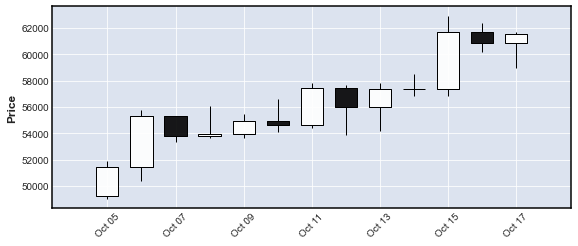

In [24]:
random_date = random.randint(0, len(list_validate_dates_hammer)-1)
print(df.index.get_loc(list_validate_dates_hammer[random_date]))
print(list_validate_dates_hammer[random_date])
print(list_new_sign_hammer[random_date])
idx = df.index.get_loc(list_validate_dates_hammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Piercing

In [25]:
random_date = random.randint(0, len(list_validate_dates_piercing)-1)
print(df.index.get_loc(list_validate_dates_piercing[random_date]))
print(list_validate_dates_piercing[random_date])
print(list_new_sign_piercing[random_date])
idx = df.index.get_loc(list_validate_dates_piercing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Morning Star

In [26]:
random_date = random.randint(0, len(list_validate_dates_morningstar)-1)
print(df.index.get_loc(list_validate_dates_morningstar[random_date]))
print(list_validate_dates_morningstar[random_date])
print(list_new_sign_morningstar[random_date])
idx = df.index.get_loc(list_validate_dates_morningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Bullish engulfing

833
2019-12-13
36.76813700933504


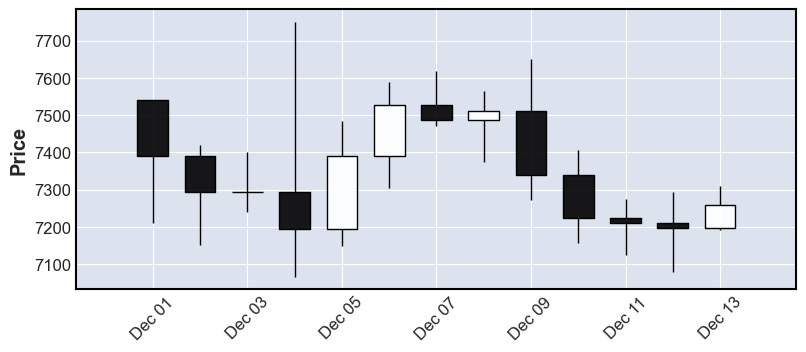

In [27]:
random_date = random.randint(0, len(list_validate_dates_bullishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bullishengulfing[random_date]))
print(list_validate_dates_bullishengulfing[random_date])
print(list_new_sign_bullishengulfing[random_date])
idx = df.index.get_loc(list_validate_dates_bullishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

### Get the dates from the bearish candlesticks patterns

In [28]:
list_dates_shootingstar = df[df['CDLSHOOTINGSTAR'] == -100]['date'].to_list()
list_dates_hangingman = df[df['CDLHANGINGMAN'] == -100]['date'].to_list()
list_dates_darkcloudcover = df[df['CDLDARKCLOUDCOVER'] == -100]['date'].to_list()
list_dates_eveningstar = df[df['CDLEVENINGSTAR'] == -100]['date'].to_list()
list_dates_bearishengulfing = df[df['CDLENGULFINGBEARISH'] == -100]['date'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [29]:
print(f'BEFORE: number of shooting star:{len(list_dates_shootingstar)}')
print(f'BEFORE: number of hangingman:{len(list_dates_hangingman)}')
print(f'BEFORE: number of dark cloud cover:{len(list_dates_darkcloudcover)}')
print(f'BEFORE: number of evening star:{len(list_dates_eveningstar)}')
print(f'BEFORE: number of bearish engulfing:{len(list_dates_bearishengulfing)}')

BEFORE: number of shooting star:2
BEFORE: number of hangingman:21
BEFORE: number of dark cloud cover:0
BEFORE: number of evening star:3
BEFORE: number of bearish engulfing:75


#### Run the checks to identify the real candlesticks with reversal

In [30]:
list_validate_dates_shootingstar = []
list_new_sign_shootingstar = []
list_sign_shootingstar = [0] * len(list_all_dates)
for date in list_dates_shootingstar:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if (i<=0):
        list_validate_dates_shootingstar.append(date)
        list_new_sign_shootingstar.append(i*100)
        list_sign_shootingstar[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_shootingstar.append(0)                    

In [31]:
print(dict(zip(list_validate_dates_shootingstar, list_new_sign_shootingstar)))

{}


In [32]:
list_validate_dates_hangingman = []
list_new_sign_hangingman = []
list_sign_hangingman = [0] * len(list_all_dates)
for date in list_dates_hangingman:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if (i<=0):
        list_validate_dates_hangingman.append(date)
        list_new_sign_hangingman.append(i*100)
        list_sign_hangingman[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_hangingman.append(0)         

In [33]:
print(dict(zip(list_validate_dates_hangingman, list_new_sign_hangingman)))

{'2018-01-06': -51.09610982926377, '2018-03-04': -46.872036642843625, '2019-02-10': -35.66927171165272, '2019-03-20': -5.570146234656889, '2020-03-18': -75.48217169712446, '2020-09-12': -67.25130481706013, '2020-12-06': -28.46672812771604, '2021-03-06': -57.710588848107825, '2022-06-25': -65.07567101895104, '2022-09-11': -49.23833524269791, '2022-12-22': -2.32699685927391, '2022-12-25': -64.45447381164703}


In [34]:
list_validate_dates_darkcloudcover = []
list_new_sign_darkcloudcover = []
list_sign_darkcloudcover = [0] * len(list_all_dates)
for date in list_dates_darkcloudcover:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if (i<=0):
        list_validate_dates_darkcloudcover.append(date)
        list_new_sign_darkcloudcover.append(i*100)
        list_sign_darkcloudcover[list_all_dates.index(date)] = i*100   
    # else:
    #     list_sign_darkcloudcover.append(0)          

In [35]:
print(dict(zip(list_validate_dates_darkcloudcover, list_new_sign_darkcloudcover)))

{}


In [36]:
list_validate_dates_eveningstar = []
list_new_sign_eveningstar = []
list_sign_eveningstar = [0] * len(list_all_dates)
for date in list_dates_eveningstar:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if (i<=0):
        list_validate_dates_eveningstar.append(date)
        list_new_sign_eveningstar.append(i*100)
        list_sign_eveningstar[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_eveningstar.append(0)         

In [37]:
print(dict(zip(list_validate_dates_eveningstar, list_new_sign_eveningstar)))

{'2018-04-09': -54.11374059957424, '2022-06-01': -39.42775172631308, '2022-12-15': -23.993128782255695}


In [38]:
list_validate_dates_bearishengulfing = []
list_new_sign_bearishengulfing = []
list_sign_bearishengulfing = [0] * len(list_all_dates)
for date in list_dates_bearishengulfing:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if (i<=0):
        list_validate_dates_bearishengulfing.append(date)
        list_new_sign_bearishengulfing.append(i*100)
        list_sign_bearishengulfing[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_bearishengulfing.append(0)         

In [39]:
print(dict(zip(list_validate_dates_bearishengulfing, list_new_sign_bearishengulfing)))

{'2017-12-30': -68.1021269024468, '2018-03-14': -67.79750671104348, '2018-03-24': -52.615158917002326, '2018-05-25': -42.55589858449696, '2018-06-21': -60.878638097610846, '2018-07-20': -43.82631199212203, '2018-10-17': -58.80399511739455, '2018-11-22': -43.385936636177256, '2018-11-26': -72.2739028280494, '2018-12-13': -76.6601265672721, '2019-01-20': -60.943519741591324, '2019-03-31': -49.77662460820447, '2019-04-21': -44.537734769043155, '2019-07-10': -53.139636885221186, '2019-09-29': -48.83157280403112, '2019-10-03': -70.49663156300515, '2019-11-07': -53.428426039793855, '2019-11-18': -64.84649642374795, '2019-12-21': -59.71841335704341, '2020-09-08': -22.226372002860153, '2020-09-28': -59.42745649003929, '2020-12-04': -22.209606852592657, '2021-01-31': -55.66728281850365, '2021-03-24': -24.174555666039975, '2021-05-23': -79.55751625268196, '2021-07-05': -20.188165431450138, '2021-07-12': -41.899537073310285, '2021-07-15': -68.61129999661732, '2021-07-19': -23.557585791115827, '20

#### Get the amount of candlesticks patterns (after check)

In [40]:
print(f'AFTER: number of shooting star:{len(list_validate_dates_shootingstar)}')
print(f'AFTER: number of hangingman:{len(list_validate_dates_hangingman)}')
print(f'AFTER: number of dark cloud cover:{len(list_validate_dates_darkcloudcover)}')
print(f'AFTER: number of evening star:{len(list_validate_dates_eveningstar)}')
print(f'AFTER: number of bearish engulfoing:{len(list_validate_dates_bearishengulfing)}')

AFTER: number of shooting star:0
AFTER: number of hangingman:12
AFTER: number of dark cloud cover:0
AFTER: number of evening star:3
AFTER: number of bearish engulfoing:36


### Plot some results

#### Shooting Star

In [41]:
random_date = random.randint(0, len(list_validate_dates_shootingstar)-1)
print(df.index.get_loc(list_validate_dates_shootingstar[random_date]))
print(list_validate_dates_shootingstar[random_date])
print(list_new_sign_shootingstar[random_date])
idx = df.index.get_loc(list_validate_dates_shootingstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Hangingman

1938
2022-12-22
-2.32699685927391


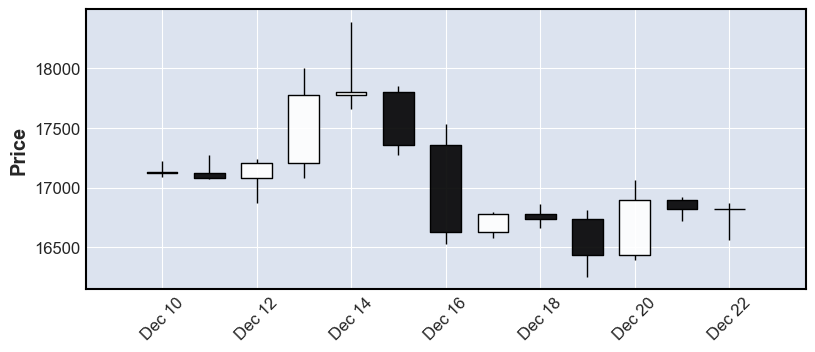

In [42]:
random_date = random.randint(0, len(list_validate_dates_hangingman)-1)
print(df.index.get_loc(list_validate_dates_hangingman[random_date]))
print(list_validate_dates_hangingman[random_date])
print(list_new_sign_hangingman[random_date])
idx = df.index.get_loc(list_validate_dates_hangingman[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Dark Cloud Cover

In [43]:
random_date = random.randint(0, len(list_validate_dates_darkcloudcover)-1)
print(df.index.get_loc(list_validate_dates_darkcloudcover[random_date]))
print(list_validate_dates_darkcloudcover[random_date])
print(list_new_sign_darkcloudcover[random_date])
idx = df.index.get_loc(list_validate_dates_darkcloudcover[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Evening Star

1734
2022-06-01
-39.42775172631308


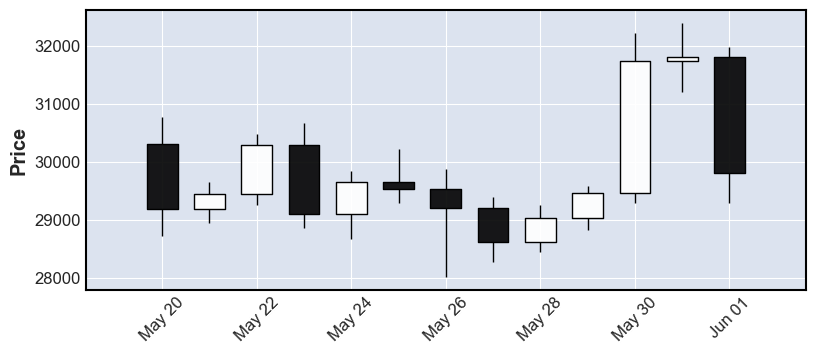

In [44]:
random_date = random.randint(0, len(list_validate_dates_eveningstar)-1)
print(df.index.get_loc(list_validate_dates_eveningstar[random_date]))
print(list_validate_dates_eveningstar[random_date])
print(list_new_sign_eveningstar[random_date])
idx = df.index.get_loc(list_validate_dates_eveningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Bearish Engulfing

1803
2022-08-09
-64.01190592217192


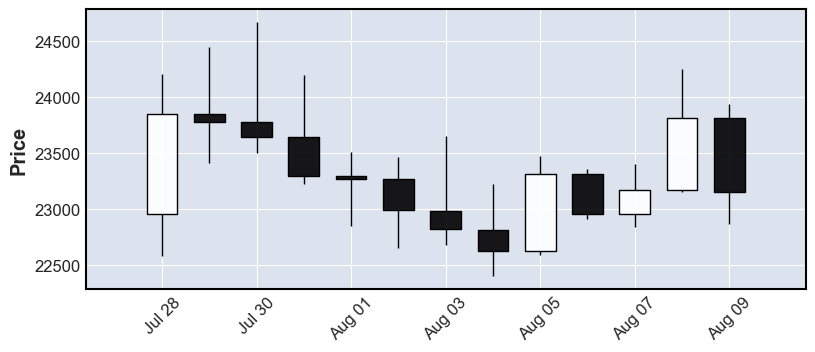

In [45]:
random_date = random.randint(0, len(list_validate_dates_bearishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bearishengulfing[random_date]))
print(list_validate_dates_bearishengulfing[random_date])
print(list_new_sign_bearishengulfing[random_date])
idx = df.index.get_loc(list_validate_dates_bearishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

## Create the Data with the validation

In [46]:
# list_new_column_name = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW']
# list_of_list_valid_dates = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar]
# list_of_list_new_sign = [list_new_sign_invertedhammer, list_new_sign_hammer, list_new_sign_piercing, list_new_sign_morningstar, list_new_sign_shootingstar, list_new_sign_hangingman, list_new_sign_darkcloudcover, list_new_sign_eveningstar]

list_new_column_name_pos = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLENGULFINGBULLISH_NEW']
list_new_column_name_neg = ['CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW', 'CDLENGULFINGBEARISH_NEW']

list_of_list_valid_dates_pos = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_bullishengulfing]
list_of_list_valid_dates_neg = [list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar, list_validate_dates_bearishengulfing]

# list_of_list_new_sign_pos = [list_new_sign_invertedhammer, list_new_sign_hammer, list_new_sign_piercing, list_new_sign_morningstar, list_new_sign_bullishengulfing]
# list_of_list_new_sign_neg = [list_new_sign_shootingstar, list_new_sign_hangingman, list_new_sign_darkcloudcover, list_new_sign_eveningstar, list_new_sign_bearishengulfing]

list_of_list_sign_pos = [list_sign_invertedhammer, list_sign_hammer, list_sign_piercing, list_sign_morningstar, list_sign_bullishengulfing]
list_of_list_sign_neg = [list_sign_shootingstar, list_sign_hangingman, list_sign_darkcloudcover, list_sign_eveningstar, list_sign_bearishengulfing]

In [47]:
df.shape

(1948, 28)

In [48]:
for i in range(0, len(list_new_column_name_pos)):
    df[list_new_column_name_pos[i]] = np.where(df['date'].isin(list_of_list_valid_dates_pos[i]), list_of_list_sign_pos[i], 0)

In [49]:
for i in range(0, len(list_new_column_name_neg)):
    df[list_new_column_name_neg[i]] = np.where(df['date'].isin(list_of_list_valid_dates_neg[i]), list_of_list_sign_neg[i], 0)

In [50]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2017-09-01,1504224000000,4689.89,4885.55,4654.88,4834.91,560.666366,1504310399999,2.665166e+06,4000,118.660103,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0
2017-09-02,1504310400000,4796.16,4939.19,4286.87,4472.14,929.148595,1504396799999,4.257724e+06,7475,379.199863,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0
2017-09-03,1504396800000,4508.50,4714.76,4298.33,4509.08,691.216198,1504483199999,3.121053e+06,6022,258.934536,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0
2017-09-04,1504483200000,4505.00,4527.49,3972.51,4100.11,1394.644614,1504569599999,5.909947e+06,9317,578.600851,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0
2017-09-05,1504569600000,4106.97,4484.99,3603.00,4366.47,1228.938157,1504655999999,5.083453e+06,10084,533.476065,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0


### Check

In [51]:
df[df['CDLENGULFINGBEARISH_NEW'] < 0]

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2017-12-30,1514592000000,14378.99,14398.85,11750.00,12440.01,19221.158039,1514678399999,2.478040e+08,190204,9530.517860,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-68.102127
2018-03-14,1520985600000,9151.92,9333.78,7900.28,8170.00,49708.094108,1521071999999,4.260580e+08,399127,22883.329725,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-67.797507
2018-03-24,1521849600000,8898.04,8999.95,8491.00,8546.86,35466.609572,1521935999999,3.132548e+08,270300,17302.108090,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-52.615159
2018-05-25,1527206400000,7578.99,7649.55,7308.15,7457.00,26739.956640,1527292799999,1.997496e+08,239025,13830.870235,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-42.555899
2018-06-21,1529539200000,6763.21,6795.00,6672.57,6718.84,25428.854048,1529625599999,1.711499e+08,159783,15152.496274,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-60.878638
2018-07-20,1532044800000,7468.86,7700.00,7273.00,7337.53,46140.313447,1532131199999,3.428627e+08,251391,24006.584622,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-43.826312
2018-10-17,1539734400000,6762.76,6811.12,6676.01,6740.89,26641.431379,1539820799999,1.796417e+08,158746,13752.475923,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-58.803995
2018-11-22,1542844800000,4661.08,4721.77,4335.00,4370.00,34531.119143,1542931199999,1.574597e+08,180335,17104.716369,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-43.385937
2018-11-26,1543190400000,4088.69,4206.00,3701.00,3862.20,94504.865717,1543276799999,3.732303e+08,413339,48232.505531,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-72.273903


## Export the Data

### Export parameters

In [52]:
export_path = "../data"
export_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_processed"
export_extension = ".csv"
full_export_path = os.path.join(export_path, export_filename + export_extension)

### Export

In [53]:
df.to_csv(full_export_path, index=False)